# sklearn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly  = PolynomialFeatures(degree=2) # degree表示最多添加几次幂

In [5]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [6]:
X2 = poly.transform(X)

In [7]:
X2[:5, :]

array([[ 1.        , -0.14086366,  0.01984257],
       [ 1.        ,  1.05124882,  1.10512408],
       [ 1.        ,  1.33415974,  1.77998222],
       [ 1.        , -0.1531774 ,  0.02346332],
       [ 1.        ,  1.77559373,  3.15273308]])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

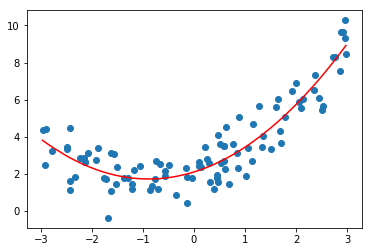

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([ 0.        ,  0.85467025,  0.4819649 ])

In [11]:
lin_reg2.intercept_

2.1066531733841476

> PolynomialFeatures当幂数上升的时候回导致X的列数快速上升

## 使用sklearn中的Pipeline来完成多项式回归

In [12]:
'''重要'''
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [13]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

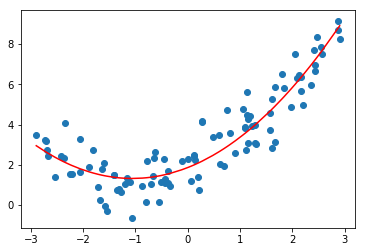

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()